In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [9]:
df = pd.read_csv('UPDATED_approved_projects_with_demographics.csv')
#df = df[['permitnumber', 'worktype', 'permittypedescr', 'declared_valuation', 'occupancytype', 'city']]
df.head()

,Unnamed: 0,Unnamed: 0.1,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
0,8,8,ERT325841,ERECT,Erect/New Construction,Erect,Combine parcels 1000004000 1000005000 10000060...,Arthur Choo,1750000.0,19361.0,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
1,9,9,ERT325841,ERECT,Erect/New Construction,Erect,Combine parcels 1000004000 1000005000 10000060...,Arthur Choo,1750000.0,19361.0,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
2,10,10,ERT325841,ERECT,Erect/New Construction,Erect,Combine parcels 1000004000 1000005000 10000060...,Arthur Choo,1750000.0,19361.0,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.096210,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
3,44,44,ERT11971,ERECT,Erect/New Construction,Erect,Raze existing single family on lot and erect n...,Michael Barone,585000.0,5934.0,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland
4,45,45,ERT301170,ERECT,Erect/New Construction,Erect,;erect eight unit building,John Omalley,900000.0,9250.0,...,"2,526",47.67%,"2,773",52.33%,42.287332,-71.157012,Brook Farm,NaN,NaN,Highland


In [10]:
worktypes_df = pd.DataFrame(columns = ['worktype', 'count'])

worktypes = df['worktype'].unique()

work_groups = df.groupby(df.worktype)

for i in range(len(worktypes)):
    temp_df = work_groups.get_group(worktypes[i])
    worktypes_df.loc[i] = [worktypes[i], len(temp_df)]

worktypes_df.loc[9] = ['UNLABELED', 19]
worktypes_df

,worktype,count
0,ERECT,815
1,NEWCON,219
2,INTEXT,1
3,EXTREN,2
4,GARAGE,3
5,,4
6,CONVRT,28
7,COB,12
8,CHGOCC,1
9,UNLABELED,19


Text(0, 0.5, 'Count')

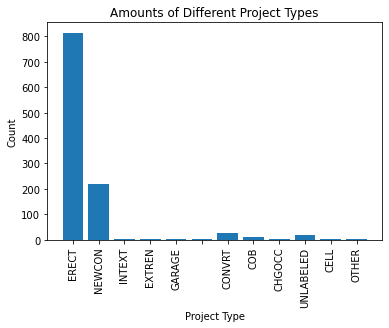

In [11]:
plt.bar(worktypes_df['worktype'], worktypes_df['count'])
plt.xticks(rotation=90)
plt.title('Amounts of Different Project Types')
plt.xlabel('Project Type')
plt.ylabel('Count')

In [12]:
permit_type_df = pd.DataFrame(columns = ['permittype', 'count'])

permittypes = df['permittypedescr'].unique()

types_groups = df.groupby(df.permittypedescr)

for i in range(len(permittypes)):
    temp_df = types_groups.get_group(permittypes[i])
    permit_type_df.loc[i] = [permittypes[i], len(temp_df)]

permit_type_df

,permittype,count
0,Erect/New Construction,970
1,Long Form/Alteration Permit,72
2,Amendment to a Long Form,48


Text(0, 0.5, 'Count')

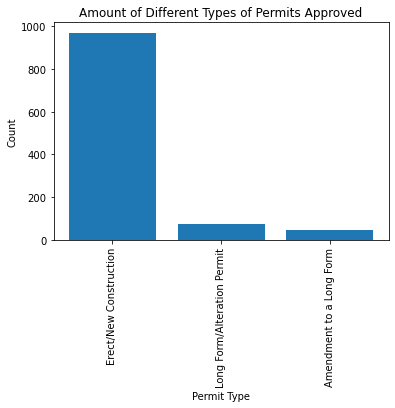

In [13]:
plt.bar(permit_type_df['permittype'], permit_type_df['count'])
plt.xticks(rotation=90)
plt.title('Amount of Different Types of Permits Approved')
plt.xlabel('Permit Type')
plt.ylabel('Count')

In [7]:
new = pd.concat([df[df['permittypedescr'] == 'Erect/New Construction'], df[df['permittypedescr'] == 'Long Form/Alteration Permit'],
                df[df['permittypedescr'] == 'Amendment to a Long Form']])
new.to_csv('UPDATED_approved_projects_with_demographics.csv')

In [14]:
occupancy_type_df = pd.DataFrame(columns = ['occupancytype', 'count'])

occupancytypes = df['occupancytype'].unique()

types_groups = df.groupby(df.occupancytype)

for i in range(len(occupancytypes)):
    temp_df = types_groups.get_group(occupancytypes[i])
    occupancy_type_df.loc[i] = [occupancytypes[i], len(temp_df)]

occupancy_type_df.loc[1] = ['Unlabeled', 6970]
occupancy_type_df

,occupancytype,count
0,Mixed,92
1,Unlabeled,6970
2,Multi,194
3,Comm,104
4,VacLd,110
5,1-3FAM,126
6,2unit,4
7,Other,36
8,7More,1
9,1-4FAM,35


Text(0, 0.5, 'Count')

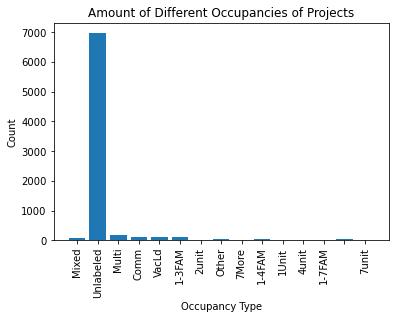

In [15]:
plt.bar(occupancy_type_df['occupancytype'], occupancy_type_df['count'])
plt.xticks(rotation=90)
plt.title('Amount of Different Occupancies of Projects')
plt.xlabel('Occupancy Type')
plt.ylabel('Count')

In [16]:
valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(30000)
df['above 30,000'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df) - sum(df['above 30,000'])]

valuation_df

,declared_valuation,count
0,"Above $30,000",809
1,"Less than or equal to $30,000",281


Text(0, 0.5, 'Count')

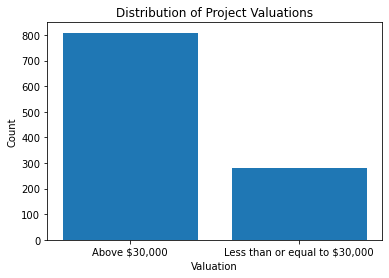

In [17]:
plt.bar(valuation_df['declared_valuation'], valuation_df['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [18]:
valuation_df2 = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(0)
df['above 0'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df2.loc[0] = ['Above $0', sum(df['above 0'])]
valuation_df2.loc[1] = ['Equal to $0', len(df) - sum(df['above 0'])]

valuation_df2

,declared_valuation,count
0,Above $0,866
1,Equal to $0,224


Text(0, 0.5, 'Count')

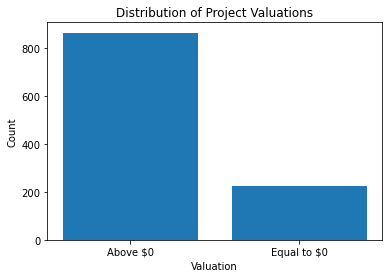

In [19]:
plt.bar(valuation_df2['declared_valuation'], valuation_df2['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [20]:
filt = df['above 0'] == 1
df2 = df[filt]

valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df2['declared_valuation'].gt(30000)
df2['above 30,000'] = (m.groupby(df2['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df2['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df2) - sum(df2['above 30,000'])]

valuation_df

<ipython-input-20-56eeea366270>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['above 30,000'] = (m.groupby(df2['permitnumber']).transform('sum').eq(1) & m).astype(int)


,declared_valuation,count
0,"Above $30,000",809
1,"Less than or equal to $30,000",57


Text(0, 0.5, 'Count')

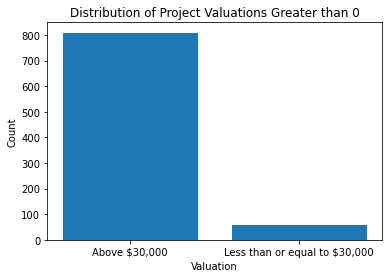

In [21]:
plt.bar(valuation_df['declared_valuation'], valuation_df['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations Greater than 0')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [79]:
neighb_df = pd.DataFrame(columns = ['neighb', 'count'])

neighbs = list(df['Neighborhood'].unique())

neighb_groups = df.groupby(df.Neighborhood)

for i in range(len(neighbs)):
    if type(neighbs[i]) == float:
        pass
    else:
        temp_df = neighb_groups.get_group(neighbs[i])
        neighb_df.loc[i] = [neighbs[i], len(temp_df)]

display(neighb_df)

,neighb,count
0,Mission Hill,15
1,West Roxbury,56
2,South Boston,191
3,Roslindale,36
4,East Boston,121
5,Jamaica Plain,55
6,Fenway,17
7,Dorchester,237
8,South End,20
9,North End,6


Text(0, 0.5, 'Count')

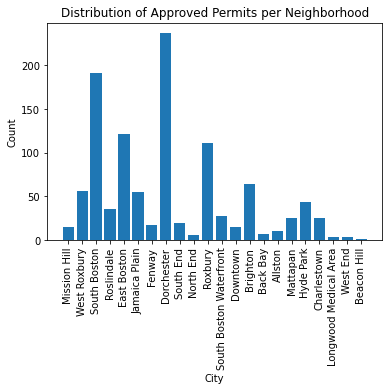

In [81]:
plt.bar(neighb_df['neighb'], neighb_df['count'])
plt.xticks(rotation=90)
plt.title('Distribution of Approved Permits per Neighborhood')
plt.xlabel('City')
plt.ylabel('Count')

In [89]:
temp = pd.read_csv('Boston_Neighborhood_Demographics_Based_On_ACS_5Year_Estimates_2015-19.csv')
pops = temp[['NEIGHBORHOOD', 'TOTAL']]

neighb_df['Proportions'] = np.zeros(shape=len(neighb_df))

for i in range(len(neighb_df)):
    try:
        filt = pops['NEIGHBORHOOD'] == neighb_df.loc[i, 'neighb']
        neighb_df.loc[i, 'Proportions'] = neighb_df.loc[i, 'count'] / pops[filt].reset_index(drop=False).loc[0, 'TOTAL']
    except KeyError:
        pass

Text(0, 0.5, 'Count')

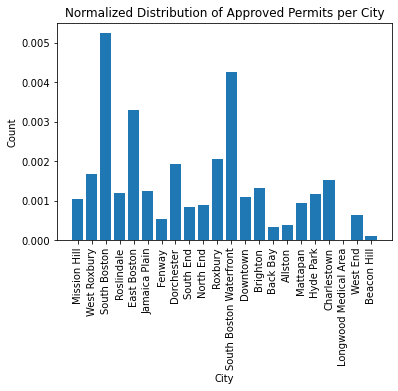

In [91]:
plt.bar(neighb_df['neighb'], neighb_df['Proportions'])
plt.xticks(rotation=90)
plt.title('Normalized Distribution of Approved Permits per City')
plt.xlabel('City')
plt.ylabel('Count')

In [94]:
new_df = pd.DataFrame(columns = ['neighb', 'count'])

neighbs = list(df['Neighborhood'].unique())

neighb_groups = df.groupby(df.Neighborhood)

for i in range(len(neighbs)):
    if type(neighbs[i]) == float:
        pass
    else:
        temp_df = neighb_groups.get_group(neighbs[i])
        filt = temp_df['permittypedescr'] == 'Erect/New Construction'
        temp_df = temp_df[filt]
        new_df.loc[i] = [neighbs[i], len(temp_df)]

display(new_df)

,neighb,count
0,Mission Hill,8
1,West Roxbury,49
2,South Boston,171
3,Roslindale,32
4,East Boston,109
5,Jamaica Plain,49
6,Fenway,12
7,Dorchester,223
8,South End,7
9,North End,5


Text(0, 0.5, 'Count')

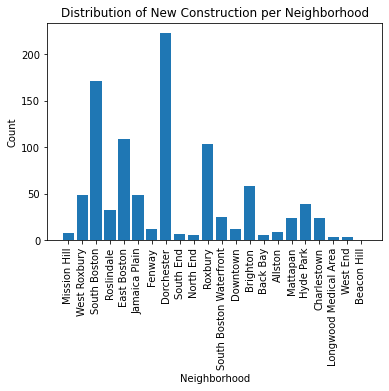

In [96]:
plt.bar(new_df['neighb'], new_df['count'])
plt.xticks(rotation=90)
plt.title('Distribution of New Construction per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

In [97]:
temp = pd.read_csv('Boston_Neighborhood_Demographics_Based_On_ACS_5Year_Estimates_2015-19.csv')
pops = temp[['NEIGHBORHOOD', 'TOTAL']]

new_df['Proportions'] = np.zeros(shape=len(new_df))

for i in range(len(new_df)):
    try:
        filt = pops['NEIGHBORHOOD'] == new_df.loc[i, 'neighb']
        new_df.loc[i, 'Proportions'] = new_df.loc[i, 'count'] / pops[filt].reset_index(drop=False).loc[0, 'TOTAL']
    except KeyError:
        pass

Text(0, 0.5, 'Count')

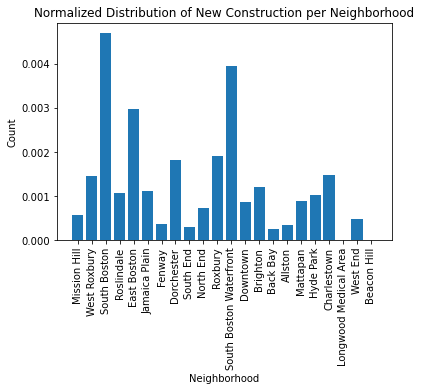

In [98]:
plt.bar(new_df['neighb'],new_df['Proportions'])
plt.xticks(rotation=90)
plt.title('Normalized Distribution of New Construction per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

In [72]:
prop_assessments = pd.read_csv('PID_Owner_Comparison_And_Address.csv')

temp = pd.DataFrame(0, columns=['Attribute', 'Count'], index=np.arange(len(list(range(3)))))
temp.loc[0, 'Attribute'] = 'In Boston'
temp.loc[1, 'Attribute'] = 'In MA'
temp.loc[2, 'Attribute'] = 'Out of State'

for i in range(len(df)):
    pid = df.loc[i, 'parcel_id']
    filt = prop_assessments['parcel_id'] == pid
    temp2 = prop_assessments[filt].reset_index(drop=False)
    if type(temp2.loc[0, 'City']) == float or type(temp2.loc[0, 'State']) == float:
        pass
    elif 'BOSTON' in temp2.loc[0, 'City']:
        temp.loc[0, 'Count'] += 1
        temp.loc[1, 'Count'] += 1
    elif temp2.loc[0, 'State'] == 'MA':
        temp.loc[1, 'Count'] += 1
    else:
        temp.loc[2, 'Count'] += 1

temp['%'] = np.zeros(3)
temp.loc[0, '%'] = temp.loc[0, 'Count']/len(df)
temp.loc[1, '%'] = temp.loc[1, 'Count']/len(df)
temp.loc[2, '%'] = temp.loc[2, 'Count']/len(df)
temp

,Attribute,Count,%
0,In Boston,302,0.277064
1,In MA,887,0.813761
2,Out of State,17,0.015596


Text(0, 0.5, '% Of Total Number of Approved Permits')

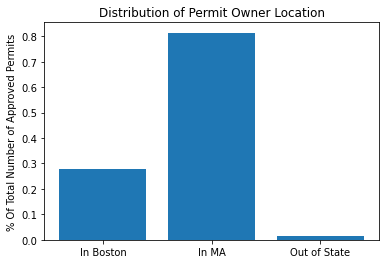

In [76]:
plt.bar(temp['Attribute'], temp['%'])
plt.title('Distribution of Permit Owner Location')
plt.ylabel('% Of Total Number of Approved Permits')

In [43]:
filt = df['permittypedescr'] == 'Excavation Permit'
df2 = df[filt]
df2['declared_valuation'].unique()

array([0.])

In [56]:
# REMOVED ALL MAIN WORKTYPE (MAIN = MAINTENANCE)
filt = df['worktype'] == 'Main'
drop = df[filt]
inds = drop.index
df = df.drop(inds)
df

,permitnumber,worktype,permittypedescr,declared_valuation,occupancytype,city
0,A1048,ERECT,Amendment to a Long Form,0.0,Mixed,Mission Hill
1,A21302,NEWCON,Amendment to a Long Form,15000.0,Mixed,Mission Hill
2,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed,Mission Hill
3,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed,Mission Hill
4,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed,Mission Hill
...,...,...,...,...,...,...
9161,EXCA-846479,Service,Excavation Permit,0.0,,South Boston
9162,EXCA-961507,Capital,Excavation Permit,0.0,,South Boston
9163,SF522908,ERECT,Short Form Bldg Permit,915.0,VacLd,South Boston
9165,SF95509,ERECT,Short Form Bldg Permit,1350.0,VacLd,Jamaica Plain


In [18]:
df = pd.read_csv('UPDATED_approved_projects_with_demographics.csv')

In [19]:
valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(30000)
df['above 30,000'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df) - sum(df['above 30,000'])]

valuation_df

,declared_valuation,count
0,"Above $30,000",809
1,"Less than or equal to $30,000",281


In [20]:
valuation_df2 = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(0)
df['above 0'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df2.loc[0] = ['Above $0', sum(df['above 0'])]
valuation_df2.loc[1] = ['Equal to $0', len(df) - sum(df['above 0'])]

valuation_df2

,declared_valuation,count
0,Above $0,866
1,Equal to $0,224


In [99]:
zba = pd.read_csv('decisions_with_demographics.csv')
zba.columns

Index(['Unnamed: 0', 'Case Number', 'Applicant', 'Address',
       'Decision (Approve/Reject)', 'geocodes', 'lat', 'long', 'Cencus Tract',
       'Zipcode', 'Neighborhood', 'US Geonames Sub-neigborhood',
       'Total Population', ' Black', 'Black Proportion', 'White',
       'White Proportion', 'American Indian & Alaska Native',
       'American Indian & Alaska Native Proportion', 'Asian',
       'Asian Proportion', 'Male ', 'Male Proportion', 'Female ',
       'Female Proportion ', 'Lat', 'Long', 'Primary Sub-Neighborhood',
       'Secondary Sub-Neighborhood', 'Teritriary Sub-Neighborhood(s)',
       'T-Stop/Commuter Rail'],
      dtype='object')

In [101]:
approval_df = pd.DataFrame(columns = ['Neighborhood', 'Approval Rate'])

neighbs = list(zba['Neighborhood'].unique())

neighb_groups = zba.groupby(zba.Neighborhood)

for i in range(len(neighbs)):
    if type(neighbs[i]) == float:
        pass
    else:
        temp_df = neighb_groups.get_group(neighbs[i])
        total = len(temp_df)
        filt = temp_df['Decision (Approve/Reject)'] == 'Approved'
        temp_df = temp_df[filt]
        approval_df.loc[i] = [neighbs[i], len(temp_df)/total]

display(approval_df)

,Neighborhood,Approval Rate
0,Allston,0.913043
1,Beacon Hill,0.916667
2,South End,0.897059
3,Back Bay,0.952381
4,Roxbury,0.945783
5,Jamaica Plain,0.786667
6,Downtown,0.944954
7,Dorchester,0.892308
8,Hyde Park,0.762500
9,West Roxbury,0.819672


Text(0, 0.5, 'Approval Rate')

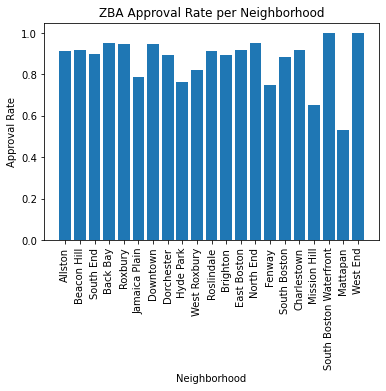

In [104]:
plt.bar(approval_df['Neighborhood'],approval_df['Approval Rate'])
plt.xticks(rotation=90)
plt.title('ZBA Approval Rate per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Approval Rate')

In [106]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'permitnumber', 'worktype',
       'permittypedescr', 'description', 'comments', 'applicant',
       'declared_valuation', 'total_fees', 'issued_date', 'expiration_date',
       'status', 'owner', 'occupancytype', 'sq_feet', 'address', 'city',
       'state', 'zip', 'property_id', 'parcel_id', 'Cencus_Tract', 'Zipcode',
       'Neighborhood', 'US Geonames Sub-neigborhood', 'Total Population',
       ' Black', 'Black Proportion', 'White', 'White Proportion',
       'American Indian & Alaska Native',
       'American Indian & Alaska Native Proportion', 'Asian',
       'Asian Proportion', 'Male ', 'Male Proportion', 'Female ',
       'Female Proportion ', 'Lat', 'Long', 'Primary Sub-Neighborhood',
       'Secondary Sub-Neighborhood', 'Teritriary Sub-Neighborhood(s)',
       'T-Stop/Commuter Rail', 'above 30,000', 'above 0'],
      dtype='object')

In [113]:
new_df['Race'] = np.zeros(shape=len(new_df))

df = df.astype({"White Proportion": int})

for i in range(len(new_df)):
    filt = df['Neighborhood'] == new_df.loc[i, 'neighb']
    temp = df[filt].reset_index(drop=False)
    if temp.loc[0, 'White Proportion'] >= 50:
        new_df.loc[i, 'Race'] = 'White'
    else:
        new_df.loc[i, 'Race'] = 'Non-White'

display(new_df)

<class 'numpy.int64'>


,neighb,count,Proportions,Race
0,Mission Hill,8,0.000561,Non-White
1,West Roxbury,49,0.001465,White
2,South Boston,171,0.004701,White
3,Roslindale,32,0.001059,White
4,East Boston,109,0.002966,White
5,Jamaica Plain,49,0.001117,White
6,Fenway,12,0.000373,White
7,Dorchester,223,0.001820,Non-White
8,South End,7,0.000289,Non-White
9,North End,5,0.000737,White


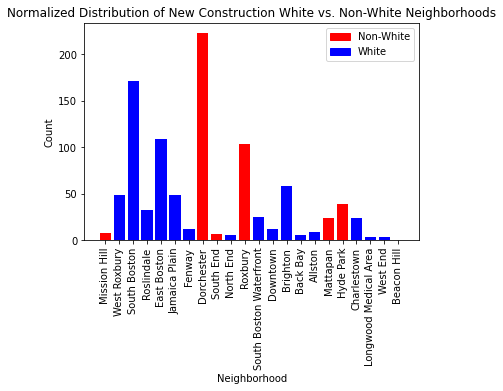

In [127]:
colors = []

for i in range(len(new_df)):
    if new_df.loc[i, 'Race'] == 'White':
        colors.append('b')
    else:
        colors.append('r')

plt.bar(new_df['neighb'],new_df['count'], color=colors)
plt.xticks(rotation=90)
plt.title('Normalized Distribution of New Construction White vs. Non-White Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
red_patch = mpatches.Patch(color='red', label='Non-White')
blue_patch = mpatches.Patch(color='blue', label='White')

plt.legend(handles=[red_patch, blue_patch])